In [3]:
import os
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.rcParams['figure.figsize'] = [16, 12]

DATASET_TYPE = 'hwu_ood'
PERIOD = '1'
FILE_NAME = os.path.join('DataProcessed', DATASET_TYPE, f'results_BERT_P{PERIOD}.txt')

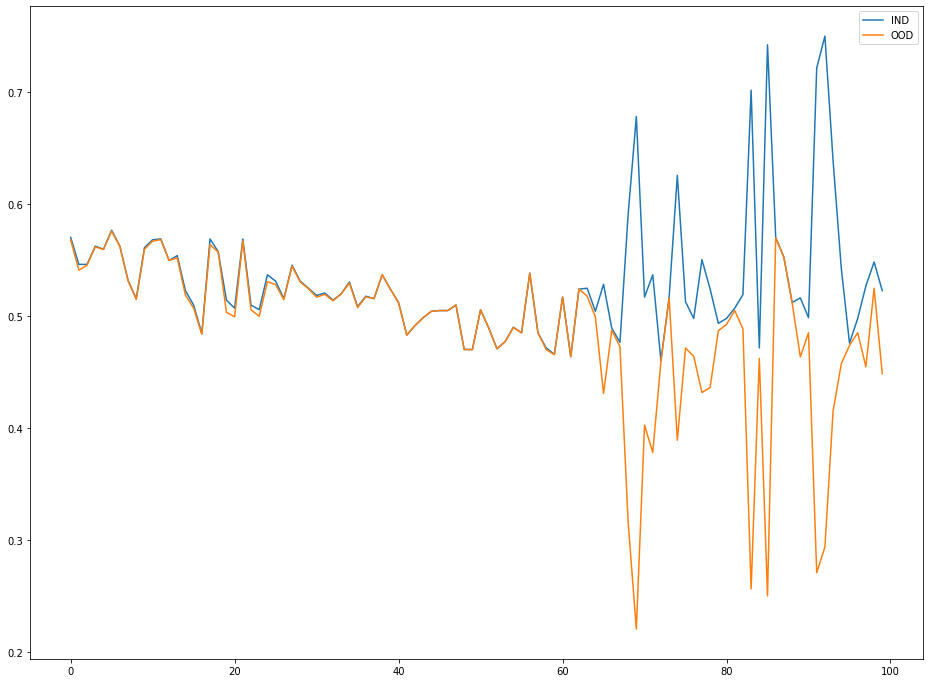

In [4]:
with open(FILE_NAME, 'r') as f: lines = f.readlines()
lines = [i.strip() for i in lines]

classwise_accuracies = {}

for line in lines:
    if 'IND\t' in line: classwise_accuracies['IND'] = classwise_accuracies.get('IND', []) + [line.split()[-1]]
    if 'OOD\t' in line: classwise_accuracies['OOD'] = classwise_accuracies.get('OOD', []) + [line.split()[-1]]

for cl in ['IND', 'OOD']:
    classwise_accuracies[cl] = [float(i) for i in classwise_accuracies[cl]]
    plt.plot(classwise_accuracies[cl])
plt.legend(['IND', 'OOD'])
plt.show()

In [5]:
ind_max = np.argmax(classwise_accuracies['IND'])
ood_max = np.argmax(classwise_accuracies['OOD'])

print('At IND Max -', ind_max+1, classwise_accuracies['IND'][ind_max], classwise_accuracies['OOD'][ind_max])
print('At OOD Max -', ood_max+1, classwise_accuracies['IND'][ood_max], classwise_accuracies['OOD'][ood_max])

At IND Max - 93 0.75 0.2938
At OOD Max - 6 0.5767 0.5759


In [ ]:
with open(FILE_NAME, 'r') as f: lines = f.readlines()
lines = [i.strip() for i in lines]

classwise_accuracies = dict()
epoch = 0
flag = 0
for line in lines:
    if 'Epoch' in line: epoch+=1
    if 'Classwise Accuracies' in line:
        flag=1
        continue
    if flag:
        if 'Accuracy' in line:
            flag=0
            continue
        key, val = line.split()
        key, val = key.strip(), float(val)
        classwise_accuracies[epoch] = classwise_accuracies.get(epoch, dict())
        classwise_accuracies[epoch][key] = classwise_accuracies[epoch].get(key, []) + [val]
len(labels), len(classwise_accuracies)

In [ ]:
graph = dict()

for epoch, accu in classwise_accuracies.items():
    for k,v in accu.items():
        accu[k] = sum(v)/len(v)
    for category in REQUIRED_CLASSES:
        graph[category] = graph.get(category, []) + [accu[category]]

len(graph), [len(v) for k,v in graph.items()]

In [ ]:
for category in REQUIRED_CLASSES:
    plt.plot(graph[category])
plt.legend(graph)
plt.show()

In [ ]:
np.argmax(np.array(graph['alarm__cancel_alarm']))